<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.63
    Uninstalling yfinance-0.2.63:
      Successfully uninstalled yfinance-0.2.63
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=58e1dd474afef187bffc61662a7e3d2551807ea0cf8ada0cdfb0c43035545c96
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-06-30 18:27:50
-------------------
qualified stocks: 96
with latest results: 31
still star stocks: 20
-------------------
Initial Investment:  1.17 C
CY Investment:  1.44 C
Reserve:  6.47 K
Current:  1.36 C
-------------------
Today PnL: 72.64 K (0.54%)
Current PnL: -13.54 L (-9.43%)
CY Booked + Current PnL: -6.80 L (-4.74%)
-------------------
Total profit:  4.41 L
Total loss:  -17.95 L
-------------------
Total Booked + Current PnL: 20.18 L (17.32%)
Total Booked PnL: 33.72 L (28.93%)
Curr Year Booked PnL: 6.74 L (4.94%)
Prev Year Booked PnL: 26.98 L (23.15%)
Est FTT:  2.08 C
Est FTT PnL: 71.96 L (52.77%)
Deployed:  1.17 C
Current:  1.36 C
CAGR/XIRR %: 10.74%
Row successfully appended and saved to data/myPortfolioDB.csv.


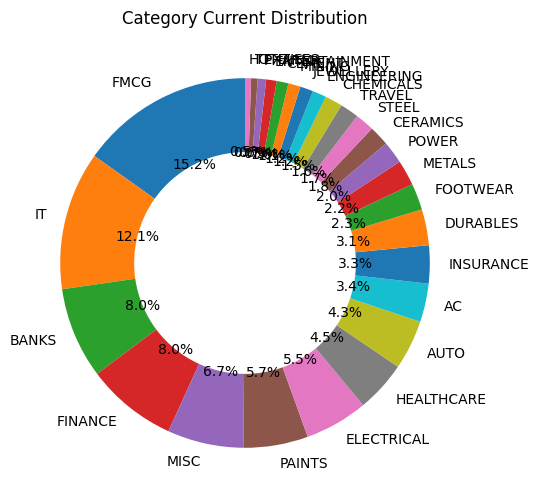

In [21]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSI_14', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
32,ENRIN,1377.95,2975.90,NaN,NaN,NaN,82.29,74398.0,39949.0,0.0,...,115.97,0.00,115.97,NaN,inf,0.55,13.77,AR,ELECTRICAL,ATH
16,BLUSPRING,226.45,84.55,NaN,NaN,46.0,5.21,16631.0,-32962.0,1886.0,...,-66.46,11.34,-62.66,NaN,-17.48,0.12,11.53,XY24,MISC,ATH
28,DIGITIDE,188.38,237.72,NaN,NaN,23.0,1.04,42952.0,1697.0,9110.0,...,4.11,21.21,26.19,1.0,0.19,0.32,0.00,XY24,IT,ATH
3,ADANIPORTS,1103.69,1583.00,2.40,M-LC,62.0,44.79,102964.0,24602.0,9432.0,...,31.40,9.16,43.43,77.0,2.61,0.76,38.38,XY24,MISC,NTT
88,UNIONBANK,123.87,163.00,0.15,M-LC,63.0,60.94,174643.0,33803.0,10688.0,...,24.00,6.12,31.59,89.0,3.16,1.28,51.70,XY24,BANKS,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,SAIL,130.64,228.00,89.46,M-MC,58.0,47.92,227287.0,2325.0,165329.0,...,1.03,72.74,74.53,185.0,0.01,1.67,31.96,XY24,STEEL,BTT
66,REPCOHOME,515.07,880.00,-52.31,H-SC,64.0,90.62,175379.0,-29619.0,174853.0,...,-14.45,99.70,70.85,133.0,-0.17,1.29,41.57,XY24,FINANCE,NTT
9,AWL,325.39,485.00,-69.07,H-MC,46.0,9.38,214459.0,-53988.0,185657.0,...,-20.11,86.57,49.05,98.0,-0.29,1.57,10.27,XY24,FMCG,NTT
11,BANDHANBNK,214.25,400.00,-26.39,H-SC,68.0,88.54,219982.0,-28548.0,244026.0,...,-11.49,110.93,86.70,129.0,-0.12,1.61,45.53,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5551.76,7934.00,-33.54,H-LC,58.0,45.83,237140.0,20621.0,72280.0,...,9.52,30.48,42.91,28.0,0.29,1.74,23.95,AR,ELECTRICAL,NTT
2,ACC,2579.05,3906.00,-35.04,M-MC,59.0,48.96,139956.0,-48315.0,145176.0,...,-25.66,103.73,51.45,166.0,-0.33,1.03,6.41,XY24,CEMENT,BTT
3,ADANIPORTS,1103.69,1583.00,2.40,M-LC,62.0,44.79,102964.0,24602.0,9432.0,...,31.40,9.16,43.43,77.0,2.61,0.76,38.38,XY24,MISC,NTT
4,ALKYLAMINE,2347.98,4546.37,9.45,X-SC,78.0,100.00,101824.0,861.0,93668.0,...,0.85,91.99,93.63,64.0,0.01,0.75,51.66,SR,CHEMICALS,ATH
5,APOLLOHOSP,6904.43,8285.00,-20.28,H-LC,63.0,63.54,108630.0,5064.0,15643.0,...,4.89,14.40,20.00,30.0,0.32,0.80,19.65,X40N,HEALTHCARE,BTT
6,ASIANPAINT,2961.56,4250.00,-19.91,H-LC,63.0,58.33,159195.0,-42191.0,129808.0,...,-20.95,81.54,43.51,32.0,-0.33,1.17,10.82,X40,PAINTS,BTT
9,AWL,325.39,485.00,-69.07,H-MC,46.0,9.38,214459.0,-53988.0,185657.0,...,-20.11,86.57,49.05,98.0,-0.29,1.57,10.27,XY24,FMCG,NTT
10,BAJAJHFL,122.26,152.00,-3.64,H-LC,49.0,30.21,199834.0,-672.0,49439.0,...,-0.34,24.74,24.33,41.0,-0.01,1.47,15.24,X40N,FINANCE,BTT
12,BANKINDIA,116.91,190.00,-30.06,M-MC,57.0,40.62,182345.0,2537.0,109881.0,...,1.41,60.26,62.52,171.0,0.02,1.34,35.98,XR,BANKS,NTT
13,BATAINDIA,1550.24,2096.00,-32.15,M-SC,50.0,16.67,101360.0,-27310.0,72604.0,...,-21.22,71.63,35.20,204.0,-0.38,0.74,3.41,X40,FOOTWEAR,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,564.75,565.0,152.40,H-SC,57.0,35.42,136538.0,-50394.0,50478.0,...,-26.96,36.97,0.04,149.0,-1.00,1.00,30.62,OX40N,FINANCE,NTT
21,CERA,8421.60,8422.0,-13.37,X-SC,58.0,79.17,89375.0,-20106.0,20109.0,...,-18.36,22.50,0.00,68.0,-1.00,0.66,35.27,OX40N,CERAMICS,NTT
46,INDIGOPNTS,1407.73,1408.0,119.87,H-SC,66.0,77.08,144113.0,-30446.0,30480.0,...,-17.44,21.15,0.02,127.0,-1.00,1.06,24.97,OX40N,PAINTS,NTT
50,JCHAC,2282.24,2282.0,19943.48,M-SC,51.0,64.58,97989.0,-29816.0,29798.0,...,-23.33,30.41,-0.01,222.0,-1.00,0.72,8.76,OX40N,AC,NTT
53,KANSAINER,299.63,340.0,-67.47,H-SC,60.0,37.50,226935.0,-42732.0,79064.0,...,-15.85,34.84,13.47,142.0,-0.54,1.66,14.78,XY24,PAINTS,NTT
64,RAJESHEXPO,517.65,518.0,1855.81,M-SC,56.0,33.33,53347.0,-83830.0,83920.0,...,-61.11,157.31,0.07,231.0,-1.00,0.39,32.68,OX40N,JEWELLERY,NTT
72,SFL,1016.35,1287.0,41.99,H-SC,60.0,95.83,187476.0,-74742.0,144563.0,...,-28.50,77.11,26.63,144.0,-0.52,1.38,16.56,XY24,MISC,NTT
75,SIS,477.00,477.0,2239.90,M-SC,58.0,56.25,62951.0,-18139.0,18136.0,...,-22.37,28.81,0.00,227.0,-1.00,0.46,27.58,OX40N,MISC,NTT
79,SYMPHONY,1306.42,1306.0,-33.93,M-SC,30.0,2.08,140851.0,-30290.0,30241.0,...,-17.70,21.47,-0.03,189.0,-1.00,1.03,1.23,OX40N,DURABLES,NTT
81,TATAELXSI,7332.28,7332.0,-15.80,X-MC,52.0,25.00,88340.0,-14312.0,14311.0,...,-13.94,16.20,-0.00,58.0,-1.00,0.65,34.29,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2579.05,3906.00,-35.04,M-MC,59.0,48.96,139956.0,-48315.0,145176.0,...,-25.66,103.73,51.45,166.0,-0.33,1.03,6.41,XY24,CEMENT,BTT
3,ADANIPORTS,1103.69,1583.00,2.40,M-LC,62.0,44.79,102964.0,24602.0,9432.0,...,31.40,9.16,43.43,77.0,2.61,0.76,38.38,XY24,MISC,NTT
8,ATULAUTO,624.44,844.00,3381.08,M-SC,47.0,10.42,108536.0,-38832.0,90649.0,...,-26.35,83.52,35.16,232.0,-0.43,0.80,10.86,XY24,AUTO,NTT
9,AWL,325.39,485.00,-69.07,H-MC,46.0,9.38,214459.0,-53988.0,185657.0,...,-20.11,86.57,49.05,98.0,-0.29,1.57,10.27,XY24,FMCG,NTT
11,BANDHANBNK,214.25,400.00,-26.39,H-SC,68.0,88.54,219982.0,-28548.0,244026.0,...,-11.49,110.93,86.70,129.0,-0.12,1.61,45.53,XY24,BANKS,NTT
14,BERGEPAINT,561.33,680.00,-15.15,H-MC,65.0,57.29,240023.0,12684.0,35379.0,...,5.58,14.74,21.14,116.0,0.36,1.76,34.39,XY24,PAINTS,NTT
16,BLUSPRING,226.45,84.55,NaN,NaN,46.0,5.21,16631.0,-32962.0,1886.0,...,-66.46,11.34,-62.66,NaN,-17.48,0.12,11.53,XY24,MISC,ATH
17,BRITANNIA,4983.33,6446.05,17.40,X-LC,71.0,70.83,269146.0,39913.0,27372.0,...,17.41,10.17,29.35,10.0,1.46,1.97,27.89,XY25,FMCG,ATH
19,CAMPUS,294.86,393.00,-23.60,M-SC,50.0,12.50,159036.0,-8739.0,64585.0,...,-5.21,40.61,33.28,205.0,-0.14,1.17,23.13,XY24,FOOTWEAR,NTT
23,COALINDIA,406.65,512.15,3.03,L-LC,47.0,21.88,145022.0,-5438.0,44478.0,...,-3.61,30.67,25.94,159.0,-0.12,1.06,10.66,XY25,MINING,ATH


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5551.76,7934.00,-33.54,H-LC,58.0,45.83,237140.0,20621.0,72280.0,...,9.52,30.48,42.91,28.0,0.29,1.74,23.95,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,9.45,X-SC,78.0,100.00,101824.0,861.0,93668.0,...,0.85,91.99,93.63,64.0,0.01,0.75,51.66,SR,CHEMICALS,ATH
7,ASIANTILES,75.41,137.00,7133.33,M-SC,59.0,69.79,79367.0,-14443.0,91058.0,...,-15.40,114.73,81.67,242.0,-0.16,0.58,53.70,XR,CERAMICS,NTT
12,BANKINDIA,116.91,190.00,-30.06,M-MC,57.0,40.62,182345.0,2537.0,109881.0,...,1.41,60.26,62.52,171.0,0.02,1.34,35.98,XR,BANKS,NTT
18,BSOFT,628.85,844.81,-9.72,M-SC,58.0,80.21,75862.0,-34187.0,71978.0,...,-31.07,94.88,34.34,200.0,-0.47,0.56,24.89,XR,IT,ATH
24,COFFEEDAY,59.14,80.00,-51.71,L-SC,62.0,97.92,71904.0,-41645.0,81697.0,...,-36.68,113.62,35.27,261.0,-0.51,0.53,75.99,XR,HOTELS,NTT
27,DEN,52.79,75.00,115.03,L-SC,61.0,32.29,60560.0,-23904.0,59440.0,...,-28.30,98.15,42.07,258.0,-0.40,0.44,28.61,AR,ENTERTAINMENT,NTT
32,ENRIN,1377.95,2975.90,NaN,NaN,NaN,82.29,74398.0,39949.0,0.0,...,115.97,0.00,115.97,NaN,inf,0.55,13.77,AR,ELECTRICAL,ATH
34,HAPPSTMNDS,919.80,1496.95,-1.22,M-SC,62.0,87.50,68870.0,-27709.0,88312.0,...,-28.69,128.23,62.75,209.0,-0.31,0.51,20.76,AR,IT,ATH
35,HATHWAY,19.74,31.40,1015.94,L-SC,62.0,31.25,63960.0,-15000.0,61638.0,...,-19.00,96.37,59.07,262.0,-0.24,0.47,28.33,XR,ENTERTAINMENT,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.98
1,20,34.92
2,30,48.53


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,43.50
LC,34.12
MC,21.42


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,31.54
X40,12.21
XY25,12.09
X40N,11.76
XR,10.16
AR,8.31
OX40N,8.14
MH,1.70
X5K,1.47


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,20.63
M-SC,16.03
H-LC,14.16
X-LC,12.23
H-MC,9.48
X-MC,7.54
M-LC,6.67
X-SC,4.38
M-MC,4.04


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.37
          M-SC          6.24
XY25      X-LC          5.98
X40N      H-LC          4.82
XY24      H-MC          4.22
X40       X-LC          4.08
XY24      M-LC          3.87
X40N      H-SC          3.62
OX40N     M-SC          3.57
X40       X-MC          3.25
XR        M-SC          3.22
X40       H-LC          3.05
AR        H-SC          2.76
XY24      M-MC          2.70
OX40N     H-SC          2.66
XR        H-SC          2.27
AR        H-LC          1.74
XY24      H-LC          1.68
          X-SC          1.61
XY25      M-LC          1.59
X40N      X-LC          1.57
X5K       H-LC          1.47
XY25      H-MC          1.45
X200      H-LC          1.40
XY24      X-MC          1.39
XY25      X-MC          1.38
XR        M-MC          1.34
OX40N     X-SC          1.26
XR        M-LC          1.21
AR        M-SC          1.13
X40       H-MC          1.09
AR        H-MC          1.09
XY25      L-LC          1.06
XY24      L-SC          1.02
XR        L-SC          1.00
MH        H-SC          0.95
X40N      H-MC          0.88
          X-MC          0.87
XR        X-SC          0.76
MH        H-MC          0.75
SR        X-SC          0.75
X40       M-SC          0.74
OX40N     X-MC          0.65
XY25      M-SC          0.63
AR        X-LC          0.60
SR        M-SC          0.50
AR        L-SC          0.44
XR        L-MC          0.36
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,15.17,-1.24,35.09
IT,12.11,-10.12,64.22
FINANCE,7.97,-11.18,51.42
BANKS,7.96,-4.91,47.72
MISC,6.66,-14.63,67.70
PAINTS,5.65,-13.33,35.67
ELECTRICAL,5.54,2.13,43.57
HEALTHCARE,4.48,-5.56,36.40
AUTO,4.34,-14.41,64.72


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,69.9,9522871.0,-7.55,-719017.0,48.54,4622664.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,59.21,8068243.0,-1.91,-154215.0,40.76,3288497.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2704976.0
XR,1074913.0
AR,1011933.0
X40,654620.0
X40N,562654.0
XY25,471938.0
OX40N,320508.0
SR,174554.0
MH,83823.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,1970749.0
M-SC,1760383.0
H-LC,611040.0
H-MC,541337.0
X-LC,508125.0
X-MC,426071.0
M-MC,420386.0
X-SC,322823.0
M-LC,263782.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          850750.0
          M-SC          811848.0
AR        H-SC          519056.0
XR        M-SC          331921.0
XY24      M-MC          310505.0
          H-MC          297086.0
X40       X-LC          240324.0
X40N      H-SC          233124.0
XR        H-SC          218823.0
X40N      H-LC          200273.0
AR        M-SC          180129.0
OX40N     M-SC          172818.0
X40       H-LC          160565.0
XY24      M-LC          156980.0
X40       X-MC          151271.0
XR        L-SC          143335.0
          X-SC          122564.0
AR        X-LC          117957.0
XY25      M-SC          110177.0
XR        M-MC          109881.0
XY25      X-LC          109245.0
          X-MC          106081.0
XY24      X-MC           97406.0
XR        M-LC           95498.0
OX40N     H-SC           94188.0
SR        X-SC           93668.0
XY25      H-MC           90653.0
SR        M-SC           80886.0
X40       M-SC           72604.0
AR        H-LC           72280.0
X200      H-LC           68870.0
XY24      X-SC           67400.0
X5K       H-LC           66875.0
AR        H-MC           63071.0
XY24      L-SC           59828.0
AR        L-SC           59440.0
X40N      X-MC           57002.0
MH        H-SC           54808.0
XR        L-MC           52891.0
XY25      L-LC           44478.0
XY24      H-LC           42177.0
X40N      X-LC           40599.0
OX40N     X-SC           39191.0
X40N      H-MC           31656.0
X40       H-MC           29856.0
MH        H-MC           29015.0
OX40N     X-MC           14311.0
XY25      M-LC           11304.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,21
H-SC,20
H-LC,12
H-MC,8
X-LC,7
X-MC,6
X-SC,5
M-LC,5
L-SC,4
